In [27]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine 

In [15]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [16]:
purchases = pd.DataFrame(data, index=['Khotib', 'Dendi', 'FIan', 'David'])

purchases

,apples,oranges
Khotib,3,0
Dendi,2,3
FIan,0,7
David,1,2


In [17]:
purchases.loc['Khotib']

apples     3
oranges    0
Name: Khotib, dtype: int64

In [18]:
data = pd.read_csv('data.csv')

data

,Unnamed: 0,NRP,Nama,Asal
0,1,5215100061,Muhammad Khotib,Situbondo
1,2,5215100080,Burhanudin Ahmed,Surabaya
2,3,5215100059,Ilham Cahyya,Malang


In [19]:
data = pd.read_csv('data.csv', index_col=0)

data

,NRP,Nama,Asal
1,5215100061,Muhammad Khotib,Situbondo
2,5215100080,Burhanudin Ahmed,Surabaya
3,5215100059,Ilham Cahyya,Malang


In [20]:
json = pd.read_json('data.json')

json


,Asal,NRP,Nama
0,Situbondo,5215100061,Muhammad Khotib
1,Surabaya,5215100080,Burhanudin Ahmed
2,Malang,5215100059,Ilham Cahyya
3,Jakarta,5215100109,Dito


In [43]:

#saya menggunakan mysql jadi harus membuat database terlebih dahulu dengan nama db = python dan table = purchases

con = create_engine('mysql+pymysql://root@localhost/python', echo=False)

sql = pd.read_sql_query("SELECT * FROM purchases", con)
sql


,p_id,p_item,p_qty
0,1,Apples,100
1,2,Oranges,120


In [44]:
dp = sql.set_index('p_id')
dp

,p_item,p_qty
p_id,,
1,Apples,100
2,Oranges,120


In [56]:
data.to_csv('new_purchases.csv')
json.to_json('new_purchases.json')
sql.to_sql(name='new_purchases', con=cnx, if_exists = 'replace', index=False)
#cek dengan jalankan query dibawah
#asaa = pd.read_sql_query("SELECT * FROM new_purchases", con)
#asaa


In [63]:
movies_df = pd.read_csv("movies.csv", index_col="Film")
movies_df.head()



,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
Film,,,,,,,
Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


In [64]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, Zack and Miri Make a Porno to (500) Days of Summer
Data columns (total 7 columns):
Genre                77 non-null object
Lead Studio          77 non-null object
Audience score %     77 non-null int64
Profitability        77 non-null float64
Rotten Tomatoes %    77 non-null int64
Worldwide Gross      77 non-null object
Year                 77 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 3.6+ KB


In [65]:
movies_df.shape


(77, 7)

In [66]:
temp_df = movies_df.append(movies_df)
temp_df.shape


(154, 7)

In [67]:
temp_df = temp_df.drop_duplicates()
temp_df.shape


(74, 7)

In [69]:
temp_df.drop_duplicates(inplace=True)
temp_df = movies_df.append(movies_df)  # make a new copy

temp_df.drop_duplicates(inplace=True, keep=False)

temp_df.shape

(0, 7)

In [70]:
movies_df.columns



Index(['Genre', 'Lead Studio', 'Audience score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [71]:
movies_df.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)


movies_df.columns

Index(['Genre', 'Lead Studio', 'Audience score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [73]:
movies_df.columns = ['genre', 'lead studio', 'audience score %', 'profitability',
       'rotten tomatoes %', 'worldwide Gross', 'year']


movies_df.columns

Index(['genre', 'lead studio', 'audience score %', 'profitability',
       'rotten tomatoes %', 'worldwide Gross', 'year'],
      dtype='object')

In [74]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['genre', 'lead studio', 'audience score %', 'profitability',
       'rotten tomatoes %', 'worldwide gross', 'year'],
      dtype='object')

In [75]:
movies_df.isnull()


,genre,lead studio,audience score %,profitability,rotten tomatoes %,worldwide gross,year
Film,,,,,,,
Zack and Miri Make a Porno,False,False,False,False,False,False,False
Youth in Revolt,False,False,False,False,False,False,False
You Will Meet a Tall Dark Stranger,False,False,False,False,False,False,False
When in Rome,False,False,False,False,False,False,False
What Happens in Vegas,False,False,False,False,False,False,False
Water For Elephants,False,False,False,False,False,False,False
WALL-E,False,False,False,False,False,False,False
Waitress,False,False,False,False,False,False,False
Waiting For Forever,False,False,False,False,False,False,False


In [76]:
movies_df.isnull().sum()


genre                0
lead studio          0
audience score %     0
profitability        0
rotten tomatoes %    0
worldwide gross      0
year                 0
dtype: int64

In [77]:
movies_df.dropna()


,genre,lead studio,audience score %,profitability,rotten tomatoes %,worldwide gross,year
Film,,,,,,,
Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
Water For Elephants,Drama,20th Century Fox,72,3.081421,60,$117.09,2011
WALL-E,Animation,Disney,89,2.896019,96,$521.28,2008
Waitress,Romance,Independent,67,11.089741,89,$22.18,2007
Waiting For Forever,Romance,Independent,53,0.005000,6,$0.03,2011


In [78]:
movies_df.dropna(axis=1)


,genre,lead studio,audience score %,profitability,rotten tomatoes %,worldwide gross,year
Film,,,,,,,
Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
Water For Elephants,Drama,20th Century Fox,72,3.081421,60,$117.09,2011
WALL-E,Animation,Disney,89,2.896019,96,$521.28,2008
Waitress,Romance,Independent,67,11.089741,89,$22.18,2007
Waiting For Forever,Romance,Independent,53,0.005000,6,$0.03,2011


In [81]:
revenue = movies_df['profitability']
revenue.head()


Film
Zack and Miri Make a Porno            1.747542
Youth in Revolt                       1.090000
You Will Meet a Tall Dark Stranger    1.211818
When in Rome                          0.000000
What Happens in Vegas                 6.267647
Name: profitability, dtype: float64

In [83]:
rm = revenue.mean()
rm

4.5994833979610386

In [86]:
revenue.fillna(rm, inplace=True)
movies_df.isnull().sum()


genre                0
lead studio          0
audience score %     0
profitability        0
rotten tomatoes %    0
worldwide gross      0
year                 0
dtype: int64

In [87]:
movies_df.describe()


,audience score %,profitability,rotten tomatoes %,year
count,77.000000,77.000000,77.000000,77.000000
mean,63.727273,4.599483,46.701299,2009.077922
std,13.657113,8.031990,26.095001,1.354974
min,35.000000,0.000000,3.000000,2007.000000
25%,52.000000,1.751351,26.000000,2008.000000
50%,64.000000,2.642353,45.000000,2009.000000
75%,76.000000,5.103117,64.000000,2010.000000
max,89.000000,66.934000,96.000000,2011.000000


In [88]:
movies_df['genre'].describe()


count         77
unique        10
top       Comedy
freq          41
Name: genre, dtype: object

In [89]:
movies_df['genre'].value_counts().head(10)


Comedy       41
Romance      13
Drama        13
Animation     4
romance       1
comedy        1
Comdy         1
Romence       1
Action        1
Fantasy       1
Name: genre, dtype: int64

In [90]:
movies_df.corr()


,audience score %,profitability,rotten tomatoes %,year
audience score %,1.000000,0.066278,0.608333,-0.229926
profitability,0.066278,1.000000,0.042428,-0.182130
rotten tomatoes %,0.608333,0.042428,1.000000,-0.093111
year,-0.229926,-0.182130,-0.093111,1.000000


In [91]:
genre_col = movies_df['genre']

type(genre_col)

pandas.core.series.Series

In [94]:
genre_col = movies_df[['genre']]

type(genre_col)

pandas.core.frame.DataFrame

In [97]:
subset = movies_df[['genre', 'audience score %']]

subset.head()

,genre,audience score %
Film,,
Zack and Miri Make a Porno,Romance,70
Youth in Revolt,Comedy,52
You Will Meet a Tall Dark Stranger,Comedy,35
When in Rome,Comedy,44
What Happens in Vegas,Comedy,72


In [100]:
ly = movies_df.loc["Leap Year"]

ly

genre                   Comedy
lead studio          Universal
audience score %            49
profitability          1.71526
rotten tomatoes %           21
worldwide gross        $32.59 
year                      2010
Name: Leap Year, dtype: object

In [102]:
prom = movies_df.iloc[1]
prom

genre                               Comedy
lead studio          The Weinstein Company
audience score %                        52
profitability                         1.09
rotten tomatoes %                       68
worldwide gross                    $19.62 
year                                  2010
Name: Youth in Revolt, dtype: object

In [106]:
movie_subset = movies_df.loc['Leap Year':'WALL-E']

movie_subset = movies_df.iloc[1:4]

movie_subset

,genre,lead studio,audience score %,profitability,rotten tomatoes %,worldwide gross,year
Film,,,,,,,
Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010


In [108]:
condition = (movies_df['genre'] == "Comedy")

condition.head()

Film
Zack and Miri Make a Porno            False
Youth in Revolt                        True
You Will Meet a Tall Dark Stranger     True
When in Rome                           True
What Happens in Vegas                  True
Name: genre, dtype: bool

In [109]:
movies_df[movies_df['lead studio'] == "Disney"]


,genre,lead studio,audience score %,profitability,rotten tomatoes %,worldwide gross,year
Film,,,,,,,
When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
WALL-E,Animation,Disney,89,2.896019,96,$521.28,2008
The Proposal,Comedy,Disney,74,7.867500,43,$314.70,2009
Tangled,Animation,Disney,88,1.365692,89,$355.01,2010
High School Musical 3: Senior Year,Comedy,Disney,76,22.913136,65,$252.04,2008
Gnomeo and Juliet,Animation,Disney,52,5.387972,56,$193.97,2011
Gnomeo and Juliet,Animation,Disney,52,5.387972,56,$193.97,2011
Enchanted,Comedy,Disney,80,4.005737,93,$340.49,2007


In [111]:
movies_df[movies_df['audience score %'] >= 86].head(3)


,genre,lead studio,audience score %,profitability,rotten tomatoes %,worldwide gross,year
Film,,,,,,,
WALL-E,Animation,Disney,89,2.896019,96,$521.28,2008
Tangled,Animation,Disney,88,1.365692,89,$355.01,2010
A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011


In [115]:
# and
movies_df[(movies_df['lead studio'] == 'Universal') & (movies_df['genre'] == 'Romance')].head()
# or 
#movies_df[(movies_df['lead studio'] == 'Universal') | (movies_df['genre'] == 'Romance')].head()


,genre,lead studio,audience score %,profitability,rotten tomatoes %,worldwide gross,year
Film,,,,,,,
Jane Eyre,Romance,Universal,77,0.0,85,$30.15,2011


In [116]:
movies_df[movies_df['lead studio'].isin(['Universal', 'Disney'])].head()


,genre,lead studio,audience score %,profitability,rotten tomatoes %,worldwide gross,year
Film,,,,,,,
When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
WALL-E,Animation,Disney,89,2.896019,96,$521.28,2008
The Proposal,Comedy,Disney,74,7.867500,43,$314.70,2009
Tangled,Animation,Disney,88,1.365692,89,$355.01,2010
Mamma Mia!,Comedy,Universal,76,9.234454,53,$609.47,2008


In [118]:
    movies_df[
    ((movies_df['year'] >= 2008) & (movies_df['year'] <= 2010))
    & (movies_df['audience score %'] > 80)
    & (movies_df['profitability'] < movies_df['profitability'].quantile(0.25))
]

,genre,lead studio,audience score %,profitability,rotten tomatoes %,worldwide gross,year
Film,,,,,,,
Tangled,Animation,Disney,88,1.365692,89,$355.01,2010


In [122]:
def rating_function(x):
    if x >= 70:
        return "good"
    else:
        return "bad"
    
movies_df["rating_category"] = movies_df["audience score %"].apply(rating_function)

movies_df.head(10)

,genre,lead studio,audience score %,profitability,rotten tomatoes %,worldwide gross,year,rating_category
Film,,,,,,,,
Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008,good
Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010,bad
You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010,bad
When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010,bad
What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008,good
Water For Elephants,Drama,20th Century Fox,72,3.081421,60,$117.09,2011,good
WALL-E,Animation,Disney,89,2.896019,96,$521.28,2008,good
Waitress,Romance,Independent,67,11.089741,89,$22.18,2007,bad
Waiting For Forever,Romance,Independent,53,0.005000,6,$0.03,2011,bad


In [123]:
movies_df["rating_category"] = movies_df["audience score %"].apply(lambda x: 'good' if x >= 70 else 'bad')

movies_df.head(2)

,genre,lead studio,audience score %,profitability,rotten tomatoes %,worldwide gross,year,rating_category
Film,,,,,,,,
Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008,good
Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010,bad


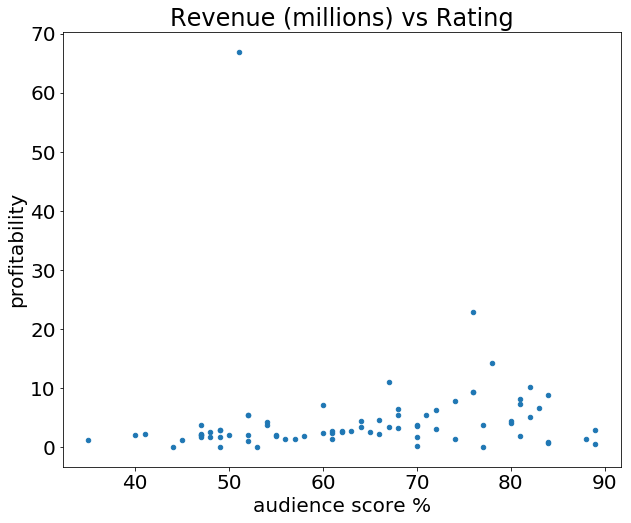

In [126]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

movies_df.plot(kind='scatter', x='audience score %', y='profitability', title='Revenue (millions) vs Rating');


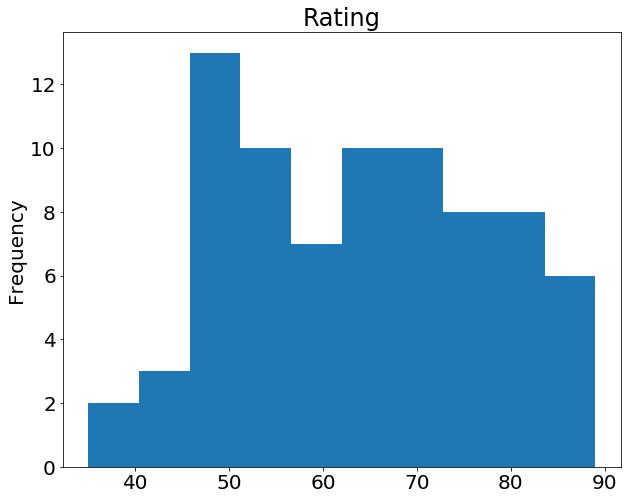

In [127]:
movies_df['audience score %'].plot(kind='hist', title='Rating');


In [128]:
rating = 'audience score %'
movies_df[rating].describe()



count    77.000000
mean     63.727273
std      13.657113
min      35.000000
25%      52.000000
50%      64.000000
75%      76.000000
max      89.000000
Name: audience score %, dtype: float64

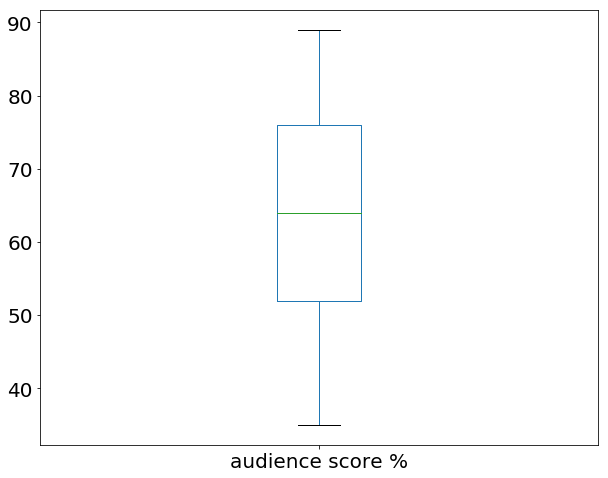

In [129]:
movies_df[rating].plot(kind="box");


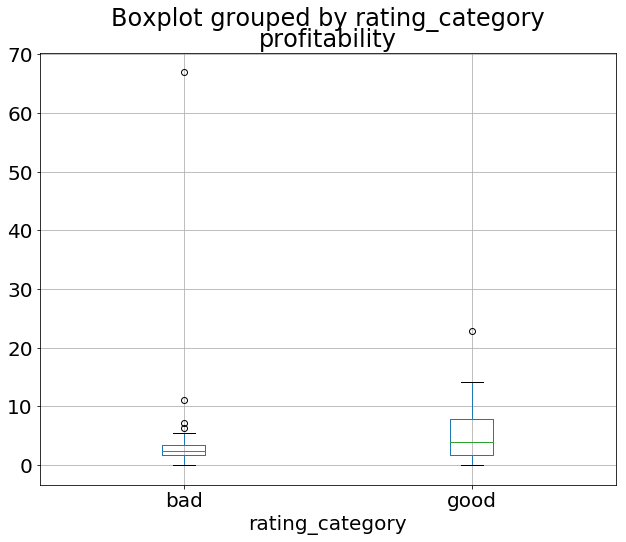

In [130]:
profit = 'profitability'
movies_df.boxplot(column=profit, by='rating_category');
